In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter
from collections import defaultdict
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.inspection import permutation_importance
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_validate, RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
#####TUNING
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
import pydotplus
from sklearn import tree
from IPython.display import Image
import seaborn as sns
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std

In [ ]:
df=pd.read_csv('df_RFE_6Class_LOF.csv')
df2=df.drop(columns=['Unnamed: 0','label'])
df2.columns

Index(['tBodyAcc-entropy()-X', 'tBodyAcc-correlation()-X,Y',
       'tBodyAcc-correlation()-Y,Z', 'tGravityAcc-mean()-Y',
       'tGravityAcc-max()-X', 'tGravityAcc-max()-Z', 'tGravityAcc-min()-X',
       'tGravityAcc-min()-Y', 'tGravityAcc-energy()-Y',
       'tGravityAcc-arCoeff()-Y,1', 'tGravityAcc-arCoeff()-Y,3',
       'tGravityAcc-arCoeff()-Z,2', 'tGravityAcc-arCoeff()-Z,4',
       'tBodyGyro-max()-X', 'tBodyGyro-min()-X', 'tBodyGyro-arCoeff()-Y,1',
       'tBodyGyro-correlation()-Y,Z', 'tBodyGyroJerk-iqr()-Y',
       'tGravityAccMag-arCoeff()1', 'fBodyAcc-max()-X', 'fBodyAcc-max()-Y',
       'fBodyAccJerk-max()-Y', 'fBodyAccJerk-bandsEnergy()-1,16',
       'fBodyGyro-maxInds-X', 'fBodyGyro-meanFreq()-X', 'fBodyAccMag-mad()',
       'fBodyAccMag-energy()', 'fBodyBodyGyroJerkMag-std()',
       'angle(Y,gravityMean)'],
      dtype='object')

In [ ]:
X = df2.values
y = np.array(df['label'])

In [ ]:
test = pd.read_csv('df_RFE_test.csv')
test2=test.drop(columns=['Unnamed: 0','label'])

In [ ]:
Xtest= test2.values
ytest = np.array(test['label'])

# Difference between Random Forest and Decision Tree

In [ ]:
######CON IL TUNING - LOF
clas = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=8, min_samples_split=30,
                             min_samples_leaf=30, min_weight_fraction_leaf=0.0, max_features='auto', random_state=0)

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(clas, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report the model performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Mean Accuracy: 0.952 (0.009)


In [ ]:
######CON IL TUNING - LOF
clas.fit(X, y)
y_pred444 = clas.predict(Xtest)

print('Accuracy %s' % accuracy_score(ytest, y_pred444))
print('F1-score %s' % f1_score(ytest, y_pred444, average=None))
print(classification_report(ytest, y_pred444))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Accuracy 0.8859857482185273
F1-score [0.89980732 0.87965921 0.90362954 0.80250784 0.82612695 1.        ]
              precision    recall  f1-score   support

           1       0.86      0.94      0.90       496
           2       0.88      0.88      0.88       471
           3       0.95      0.86      0.90       420
           4       0.82      0.78      0.80       491
           5       0.81      0.84      0.83       532
           6       1.00      1.00      1.00       537

    accuracy                           0.89      2947
   macro avg       0.89      0.88      0.89      2947
weighted avg       0.89      0.89      0.89      2947



In [ ]:
scores = {
        'Train': accuracy_score(y, clas.predict(X)),
        'Test': accuracy_score(ytest, clas.predict(Xtest)),
    }
print(scores)

{'Train': 0.9612050589739946, 'Test': 0.8859857482185273}


In [ ]:
clas.feature_importances_

array([0.00821975, 0.02213419, 0.00599913, 0.06359385, 0.07301212,
       0.02491914, 0.0910052 , 0.07972798, 0.03630747, 0.02917696,
       0.0177891 , 0.0331851 , 0.02714744, 0.01447979, 0.00847789,
       0.00167294, 0.00577837, 0.02889916, 0.02141818, 0.05366376,
       0.01020771, 0.04604724, 0.05544452, 0.00960291, 0.00946697,
       0.06485785, 0.07864728, 0.0163659 , 0.06275211])

Text(0, 0.5, 'Feature Importance')

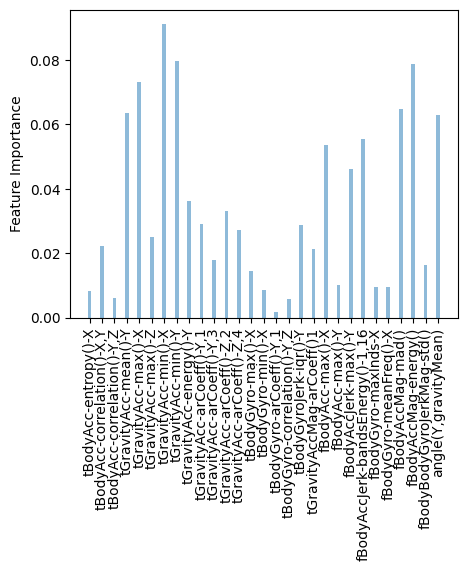

In [ ]:
names = list(df2.columns)
sorted_idx = clas.feature_importances_.argsort()
y_pos = np.arange((len(sorted_idx)))
f = plt.figure(figsize=(5,4))
plt.bar(y_pos, clas.feature_importances_, align='center', width = 0.3, alpha=0.5,
        label = "Feature")
plt.xticks(y_pos.argsort(), names, rotation=90)
plt.ylabel('Feature Importance')
#f.savefig('RF-FI.pdf',bbox_inches='tight')

In [ ]:
def plot_feature_importance(importance,names,model_type):
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

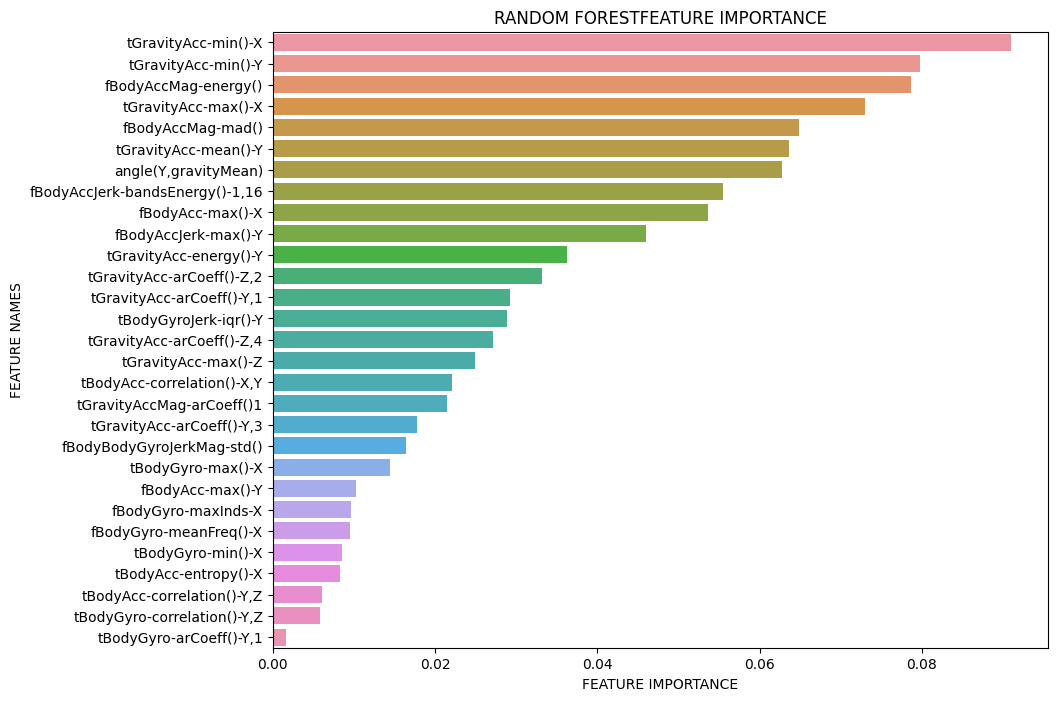

In [ ]:
plot_feature_importance(clas.feature_importances_,df2.columns,'RANDOM FOREST')

In [ ]:
clf=RandomForestClassifier()
param_list = {'max_depth': [None] + list(np.arange(2, 20)),
              'min_samples_split': [2, 5, 10, 20, 30, 50, 100],
              'min_samples_leaf': [1, 5, 10, 20, 30, 50, 100],
             'n_estimators':[100],
             'max_features': ['auto', 'log2']}

random_search = RandomizedSearchCV(clf, param_distributions=param_list, n_iter=20, cv=10)
random_search.fit(X, y)
clf = random_search.best_estimator_


y_pred6 = clf.predict(Xtest)

print('Accuracy %s' % accuracy_score(ytest, y_pred6))
print('F1-score %s' % f1_score(ytest, y_pred6, average=None))
print(classification_report(ytest, y_pred6))

Accuracy 0.8866644044791313
F1-score [0.91176471 0.86570248 0.90494297 0.80503145 0.82828283 1.        ]
              precision    recall  f1-score   support

           1       0.89      0.94      0.91       496
           2       0.84      0.89      0.87       471
           3       0.97      0.85      0.90       420
           4       0.83      0.78      0.81       491
           5       0.81      0.85      0.83       532
           6       1.00      1.00      1.00       537

    accuracy                           0.89      2947
   macro avg       0.89      0.88      0.89      2947
weighted avg       0.89      0.89      0.89      2947



In [ ]:
random_search.cv_results_['params'][random_search.cv_results_['rank_test_score'][0]]

{'n_estimators': 100,
 'min_samples_split': 30,
 'min_samples_leaf': 30,
 'max_features': 'auto',
 'max_depth': 8}

In [ ]:
clf2=DecisionTreeClassifier(min_samples_split=10, min_samples_leaf= 5, max_depth=19)

In [ ]:
clf2.fit(X, y)
y_predtree = clf2.predict(Xtest)

print('Accuracy %s' % accuracy_score(ytest, y_predtree))
print('F1-score %s' % f1_score(ytest, y_predtree, average=None))
print(classification_report(ytest, y_predtree))

Accuracy 0.8625721072276892
F1-score [0.88257576 0.79914071 0.80813215 0.81684211 0.84124088 1.        ]
              precision    recall  f1-score   support

           1       0.83      0.94      0.88       496
           2       0.81      0.79      0.80       471
           3       0.87      0.76      0.81       420
           4       0.85      0.79      0.82       491
           5       0.82      0.87      0.84       532
           6       1.00      1.00      1.00       537

    accuracy                           0.86      2947
   macro avg       0.86      0.86      0.86      2947
weighted avg       0.86      0.86      0.86      2947



In [ ]:
#score in train e test set
print('Model test Score: %.3f, ' %clf2.score(Xtest, ytest),
      'Model training Score: %.3f' %clf2.score(X, y))

Model test Score: 0.863,  Model training Score: 0.983


In [ ]:
# define the model evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(clf2, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report the model performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Mean Accuracy: 0.950 (0.008)


In [ ]:
param_list = {'max_depth': [None] + list(np.arange(2, 20)),
              'min_samples_split': [2, 5, 10, 20, 30, 50, 100],
              'min_samples_leaf': [1, 5, 10, 20, 30, 50, 100]}

random_search = RandomizedSearchCV(clf2, param_distributions=param_list, n_iter=20, cv=10)
random_search.fit(X, y)
clf2 = random_search.best_estimator_


y_pred7 = clf2.predict(Xtest)

print('Accuracy %s' % accuracy_score(ytest, y_pred7))
print('F1-score %s' % f1_score(ytest, y_pred7, average=None))
print(classification_report(ytest, y_pred7))

Accuracy 0.8520529351883271
F1-score [0.89621726 0.76793249 0.76477987 0.81334724 0.83532659 1.        ]
              precision    recall  f1-score   support

           1       0.86      0.93      0.90       496
           2       0.76      0.77      0.77       471
           3       0.81      0.72      0.76       420
           4       0.83      0.79      0.81       491
           5       0.82      0.85      0.84       532
           6       1.00      1.00      1.00       537

    accuracy                           0.85      2947
   macro avg       0.85      0.85      0.85      2947
weighted avg       0.85      0.85      0.85      2947



In [ ]:
random_search.cv_results_['params'][random_search.cv_results_['rank_test_score'][0]]

{'min_samples_split': 20, 'min_samples_leaf': 10, 'max_depth': 16}

##### Random Forest so has better accuracy then a single decision tree.

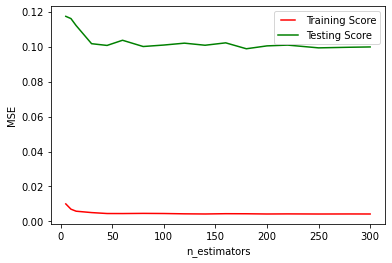

In [ ]:
train_results = []
test_results = []
list_nb_trees = [5, 10, 15, 30, 45, 60, 80, 100,120,140,160,180,200,220,250,280,300]

for nb_trees in list_nb_trees:
    rf = RandomForestRegressor(n_estimators=nb_trees)
    rf.fit(X, y)

    train_results.append(mean_squared_error(y, rf.predict(X)))
    test_results.append(mean_squared_error(ytest, rf.predict(Xtest)))

line1, = plt.plot(list_nb_trees, train_results, color="r", label="Training Score")
line2, = plt.plot(list_nb_trees, test_results, color="g", label="Testing Score")

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('MSE')
plt.xlabel('n_estimators')
plt.show()

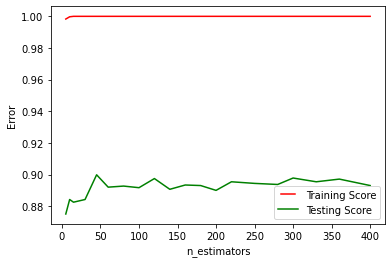

In [ ]:
train_results = []
test_results = []
list_nb_trees = [5, 10, 15, 30, 45, 60, 80, 100,120,140,160,180,200,220,250,280,300,330,360,400]

for nb_trees in list_nb_trees:
    rf = RandomForestClassifier(n_estimators=nb_trees)
    rf.fit(X, y)

    train_results.append(rf.score(X,y))
    test_results.append(rf.score(Xtest, ytest))

line1, = plt.plot(list_nb_trees, train_results, color="r", label="Training Score")
line2, = plt.plot(list_nb_trees, test_results, color="g", label="Testing Score")

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Error')
plt.xlabel('n_estimators')
plt.show()

# Proof withouth the least important features (from RF features importances)

In [ ]:
df3=df.drop(columns=['Unnamed: 0','label','tBodyGyro-arCoeff()-Y,1','tBodyGyro-correlation()-Y,Z','tBodyAcc-correlation()-Y,Z','tBodyAcc-entropy()-X','tBodyGyro-min()-X','fBodyGyro-meanFreq()-X'])
Xpr = df3.values
test3=test.drop(columns=['Unnamed: 0','label','tBodyGyro-arCoeff()-Y,1','tBodyGyro-correlation()-Y,Z','tBodyAcc-correlation()-Y,Z','tBodyAcc-entropy()-X','tBodyGyro-min()-X','fBodyGyro-meanFreq()-X'])
Xte=test3.values

In [ ]:
clasimpo = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=9, min_samples_split=5,
                             min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', random_state=0)

In [ ]:
clasimpo.fit(Xpr, y)
claspredi=clasimpo.predict(Xte)

print('Accuracy %s' % accuracy_score(ytest, claspredi))
print('F1-score %s' % f1_score(ytest, claspredi, average=None))
print(classification_report(ytest, claspredi))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Accuracy 0.8805564981336953
F1-score [0.91929134 0.85294118 0.88475836 0.79917611 0.81936685 1.        ]
              precision    recall  f1-score   support

           1       0.90      0.94      0.92       496
           2       0.84      0.86      0.85       471
           3       0.92      0.85      0.88       420
           4       0.81      0.79      0.80       491
           5       0.81      0.83      0.82       532
           6       1.00      1.00      1.00       537

    accuracy                           0.88      2947
   macro avg       0.88      0.88      0.88      2947
weighted avg       0.88      0.88      0.88      2947



# BAGGING

In [ ]:
# A helper function that will run RepeatedKFold cross validation for a range
# of ensemble sizes (est_range).
# Takes, the estimator, n_reps and the range as arguments.
def eval_bag_est_range(the_est, n_reps, est_range, folds = 10):
    n_est_dict = {}
    for n_est in est_range:
        the_bag = BaggingClassifier(the_est,
                            n_estimators = n_est,
                            max_samples = 1.0, # bootstrap resampling
                            bootstrap = True)
        bag_cv = cross_validate(the_bag, X, y, n_jobs=-1,
                                cv=RepeatedKFold(n_splits=folds, n_repeats=n_reps))
        n_est_dict[n_est]=bag_cv['test_score'].mean()
    return n_est_dict

## Using logistic regression as base estimator

In [ ]:
logb = BaggingClassifier(base_estimator=LogisticRegression(max_iter=10000), n_estimators=100, random_state=0)
logb.fit(X, y)


BaggingClassifier(base_estimator=LogisticRegression(max_iter=10000),
                  n_estimators=100, random_state=0)

In [ ]:
ypredb = logb.predict(Xtest)

print('Accuracy %s' % accuracy_score(ytest, ypredb))
print('F1-score %s' % f1_score(ytest, ypredb, average=None))
print(classification_report(ytest, ypredb))

Accuracy 0.9080420766881574
F1-score [0.9351145  0.87513812 0.92418773 0.8460733  0.86241921 0.99813433]
              precision    recall  f1-score   support

           1       0.89      0.99      0.94       496
           2       0.91      0.84      0.88       471
           3       0.93      0.91      0.92       420
           4       0.87      0.82      0.85       491
           5       0.85      0.88      0.86       532
           6       1.00      1.00      1.00       537

    accuracy                           0.91      2947
   macro avg       0.91      0.91      0.91      2947
weighted avg       0.91      0.91      0.91      2947



In [ ]:
#score in train e test set
print('Model test Score: %.3f, ' %logb.score(Xtest, ytest),
      'Model training Score: %.3f' %logb.score(X, y))

Model test Score: 0.908,  Model training Score: 0.957


## Using Random Forest as base estimator

In [ ]:
rfb = BaggingClassifier(base_estimator=RandomForestClassifier(n_estimators=100, min_samples_split=5,
                             min_samples_leaf=1), n_estimators=50, random_state=0)
rfb.fit(X, y)

BaggingClassifier(base_estimator=RandomForestClassifier(min_samples_split=5),
                  n_estimators=50, random_state=0)

In [ ]:
ypredrf = rfb.predict(Xtest)

print('Accuracy %s' % accuracy_score(ytest, ypredrf))
print('F1-score %s' % f1_score(ytest, ypredrf, average=None))
print(classification_report(ytest, ypredrf))

Accuracy 0.168306752629793
F1-score [0.28812082 0.         0.         0.         0.         0.        ]
              precision    recall  f1-score   support

           1       0.17      1.00      0.29       496
           2       0.00      0.00      0.00       471
           3       0.00      0.00      0.00       420
           4       0.00      0.00      0.00       491
           5       0.00      0.00      0.00       532
           6       0.00      0.00      0.00       537

    accuracy                           0.17      2947
   macro avg       0.03      0.17      0.05      2947
weighted avg       0.03      0.17      0.05      2947



C:\Users\maria\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\maria\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\maria\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


With estimator=100 and values parameters found in random forest tuning we get 89.8% accuracy.

In [ ]:
dtb = BaggingClassifier(base_estimator=None, n_estimators=100, random_state=0)
dtb.fit(X, y)

BaggingClassifier(n_estimators=100, random_state=0)

In [ ]:
ypredtb = dtb.predict(Xtest)

print('Accuracy %s' % accuracy_score(ytest, ypredtb))
print('F1-score %s' % f1_score(ytest, ypredtb, average=None))
print(classification_report(ytest, ypredtb))

Accuracy 0.8798778418730913
F1-score [0.90192308 0.82905983 0.86967419 0.81904762 0.84468665 1.        ]
              precision    recall  f1-score   support

           1       0.86      0.95      0.90       496
           2       0.83      0.82      0.83       471
           3       0.92      0.83      0.87       420
           4       0.85      0.79      0.82       491
           5       0.82      0.87      0.84       532
           6       1.00      1.00      1.00       537

    accuracy                           0.88      2947
   macro avg       0.88      0.88      0.88      2947
weighted avg       0.88      0.88      0.88      2947



In [ ]:
naive = BaggingClassifier(base_estimator=GaussianNB(), n_estimators=80, random_state=0)
naive.fit(X, y)

BaggingClassifier(base_estimator=GaussianNB(), n_estimators=80, random_state=0)

In [ ]:
ypredn = naive.predict(Xtest)

print('Accuracy %s' % accuracy_score(ytest, ypredn))
print('F1-score %s' % f1_score(ytest, ypredn, average=None))
print(classification_report(ytest, ypredn))

Accuracy 0.8710553104852392
F1-score [0.90149254 0.86597938 0.85956416 0.76201641 0.82222222 0.99626168]
              precision    recall  f1-score   support

           1       0.89      0.91      0.90       496
           2       0.84      0.89      0.87       471
           3       0.87      0.85      0.86       420
           4       0.90      0.66      0.76       491
           5       0.75      0.90      0.82       532
           6       1.00      0.99      1.00       537

    accuracy                           0.87      2947
   macro avg       0.88      0.87      0.87      2947
weighted avg       0.88      0.87      0.87      2947



# BOOSTING

## Adaboost

### Dection Tree as base estimator

In [ ]:
ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=8), n_estimators=100, random_state=12, algorithm='SAMME.R')
ada.fit(X, y)

y_preda = ada.predict(Xtest)

print('Accuracy %s' % accuracy_score(ytest, y_preda))
print('F1-score %s' % f1_score(ytest, y_preda, average=None))
print(classification_report(ytest, y_preda))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy 0.9009161859518154
F1-score [0.92736318 0.86820084 0.90774908 0.83315393 0.86123545 1.        ]
              precision    recall  f1-score   support

           1       0.92      0.94      0.93       496
           2       0.86      0.88      0.87       471
           3       0.94      0.88      0.91       420
           4       0.88      0.79      0.83       491
           5       0.82      0.90      0.86       532
           6       1.00      1.00      1.00       537

    accuracy                           0.90      2947
   macro avg       0.90      0.90      0.90      2947
weighted avg       0.90      0.90      0.90      2947



### Random Forest as base estimator

In [ ]:
ada = AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=60), n_estimators=70, random_state=0)
ada.fit(X, y)

y_preda = ada.predict(Xtest)

print('Accuracy %s' % accuracy_score(ytest, y_preda))
print('F1-score %s' % f1_score(ytest, y_preda, average=None))
print(classification_report(ytest, y_preda))

Accuracy 0.8887003732609433
F1-score [0.90945274 0.84854772 0.9057072  0.8185654  0.84412033 1.        ]
              precision    recall  f1-score   support

           1       0.90      0.92      0.91       496
           2       0.83      0.87      0.85       471
           3       0.95      0.87      0.91       420
           4       0.85      0.79      0.82       491
           5       0.82      0.87      0.84       532
           6       1.00      1.00      1.00       537

    accuracy                           0.89      2947
   macro avg       0.89      0.89      0.89      2947
weighted avg       0.89      0.89      0.89      2947



In [ ]:
list(ada.estimator_weights_)

[1.0, 0.0]

### Logistic Regression as base estimator

In [ ]:
loga = AdaBoostClassifier(base_estimator=LogisticRegression(), n_estimators=200, learning_rate=1.0,random_state=0)
loga.fit(X, y)

y_preda = loga.predict(Xtest)

print('Accuracy %s' % accuracy_score(ytest, y_preda))
print('F1-score %s' % f1_score(ytest, y_preda, average=None))
print(classification_report(ytest, y_preda))

Accuracy 0.8893790295215473
F1-score [0.91162791 0.83758701 0.92271106 0.81883316 0.83568075 1.        ]
              precision    recall  f1-score   support

           1       0.85      0.99      0.91       496
           2       0.92      0.77      0.84       471
           3       0.92      0.92      0.92       420
           4       0.82      0.81      0.82       491
           5       0.83      0.84      0.84       532
           6       1.00      1.00      1.00       537

    accuracy                           0.89      2947
   macro avg       0.89      0.89      0.89      2947
weighted avg       0.89      0.89      0.89      2947



In [ ]:
def get_models():
	models = dict()
	# explore depths from 1 to 10
	for i in range(1,11):
		# define base model
		base = DecisionTreeClassifier(max_depth=i)
		# define ensemble model
		models[str(i)] = AdaBoostClassifier(base_estimator=base)
	return models

In [ ]:
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

In [ ]:
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>1 0.808 (0.050)
>2 0.876 (0.030)
>3 0.932 (0.012)
>4 0.959 (0.008)
>5 0.974 (0.007)
>6 0.982 (0.005)
>7 0.987 (0.006)
>8 0.987 (0.004)
>9 0.988 (0.004)
>10 0.989 (0.004)


In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

num_estimators = [20, 40, 60, 80, 100]

for i in num_estimators:
    ada_boost = AdaBoostClassifier(n_estimators=i, random_state=12)
    results = cross_val_score(ada_boost, X, y, cv=cv)
    print("Results for {} estimators:".format(i))
    print(results.mean())

Results for 20 estimators:
0.7801269720677617
Results for 40 estimators:
0.8029544646320962
Results for 60 estimators:
0.8174975887969309
Results for 80 estimators:
0.8289104595025648
Results for 100 estimators:
0.8319421095736886
